## 2. Descriptive Analysis
For descriptive analysis, predominantly Pandas is used for data transformation, in conjunction with some useful visualization libraries, which help understanding of the obtained data.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import statsmodels.api as sm

def parse_time_value(time_string):
    # Parse the time string value and interpret it in seconds
    try:
        time_split = time_string.split(':')
        return int(time_split[0]) * 60.0 + float(time_split[1])
    except AttributeError:
        return time_string

# Set some specs for plotting
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16.0, 8.0)
mpl.style.use('ggplot')
plt.rcParams['font.family'] = 'IPAGothic'

# Read data from the data folder
race_df = pd.read_csv('data/race.csv', low_memory=False, index_col=0)
horse_df = pd.read_csv('data/horse.csv', low_memory=False, index_col=0)
individual_df = pd.read_csv('data/individual.csv', low_memory=False, index_col=0)
trainer_df = pd.read_csv('data/trainer.csv', low_memory=False, index_col=0)
jockey_df = pd.read_csv('data/jockey.csv', low_memory=False, index_col=0)

## 2.1 Race

### 2.1.1 Race Dataframe 

In [2]:
# Do some type transformation for certain columns
race_df['run_time'] = race_df['run_time'].apply(lambda x: parse_time_value(x))
race_df['distance'] = race_df['distance'].apply(lambda x: re.search(r'(\d+)m', x).group(1)).astype(int)

# Overview of the dataframe structure
race_df.sample(n=5).T

,219093,817509,580322,19947,343275
run_date,2004-08-15,2017-02-18,2012-02-19,2000-05-13,2007-04-14
place,新潟,小倉,東京,福島,中山
race,12R,9R,8R,2R,1R
title,3歳上500万下,4歳上500万下,4歳上1000万下,4歳未出走,3歳未勝利
type,芝,芝,ダ,芝,ダ
track,左,右,左,右,右
distance,2000,1800,2400,1200,1200
weather,晴,晴,晴,曇,晴
condition,良,良,良,稍重,重
time,16:15,14:15,13:55,10:15,09:55


In [3]:
# Describe the numerical variables
race_df.describe()

,distance,bracket,horse_number,jockey_weight,run_time,run_time_last_600,win_odds,win_fav,horse_id,jockey_id,trainer_id
count,856883.000000,856883.000000,856883.000000,856883.000000,856883.000000,856873.000000,856883.000000,856883.000000,8.568830e+05,856883.000000,856883.000000
mean,1628.705290,4.761106,7.854492,54.977173,101.317324,36.558623,65.701969,7.824073,2.005071e+09,1228.591001,729.018428
std,432.607865,2.268119,4.441168,1.800043,30.068261,4.679438,94.028350,4.426237,5.343048e+06,1145.264482,506.681028
min,1000.000000,1.000000,1.000000,47.000000,53.700000,12.700000,1.000000,1.000000,1.986102e+09,140.000000,101.000000
25%,1200.000000,3.000000,4.000000,54.000000,75.100000,35.600000,8.700000,4.000000,2.000109e+09,706.000000,374.000000
50%,1600.000000,5.000000,8.000000,55.000000,99.400000,37.000000,25.700000,8.000000,2.005104e+09,1031.000000,1001.000000
75%,1800.000000,7.000000,11.000000,56.000000,115.500000,38.600000,82.200000,11.000000,2.009109e+09,1102.000000,1057.000000
max,4260.000000,8.000000,18.000000,66.000000,326.400000,99.800000,999.900000,18.000000,2.015110e+09,5551.000000,5717.000000


### 2.1.2 Race Condition 

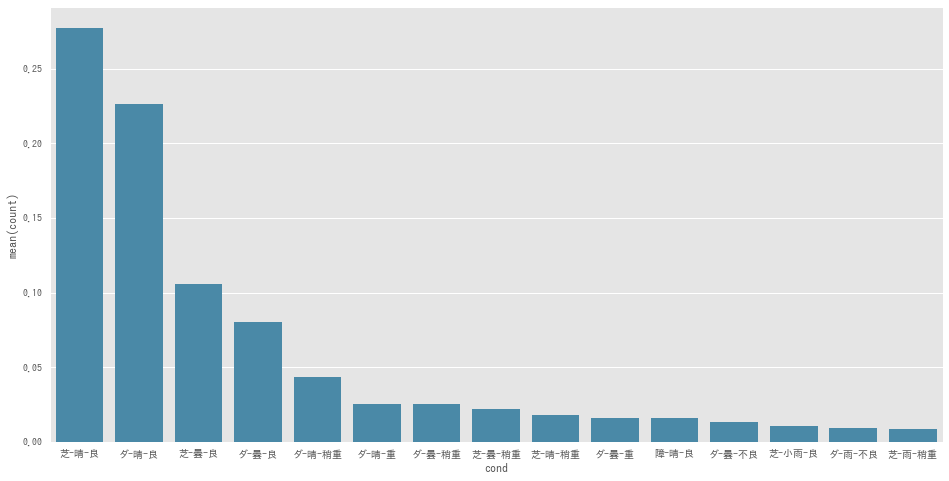

In [4]:
# Count the different race conditions
race_count = race_df.groupby(['type', 'weather', 'condition']).agg({'run_date': 'count'}).reset_index()
race_count.columns = ['type', 'weather', 'condition', 'count']
race_count['count'] = race_count['count'] / race_count['count'].sum()
race_count['cond'] = race_count['type'].str.cat(race_count['weather'], sep='-').str.cat(race_count['condition'], sep='-')
race_count_sorted = race_count.sort_values('count', ascending=False)[:15]
sns.barplot(y='count', x='cond', data=race_count_sorted, color='#3A8FB7')

### 2.1.3 Time and Distance

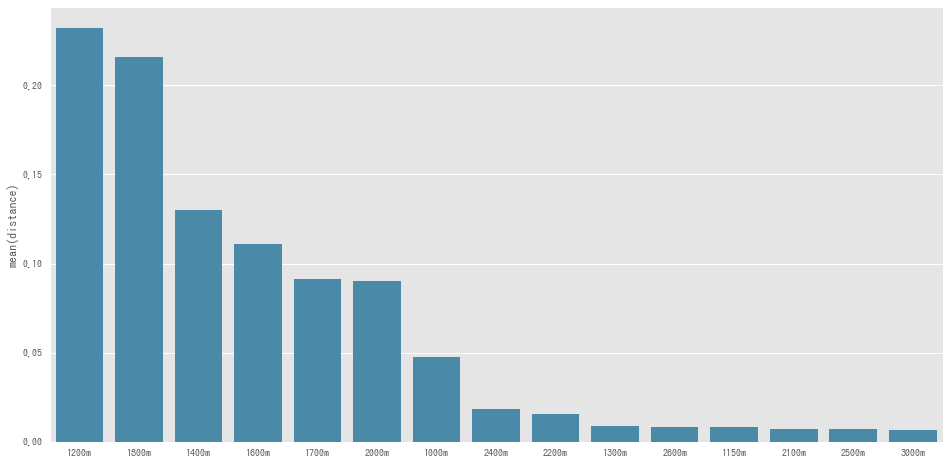

In [5]:
# Get the top run distance among the events
distance_count = race_df['distance'].value_counts()[:15]
distance_count.index = list(map(lambda x: '%sm' % str(x), distance_count.index))
sns.barplot(x=distance_count.index, y=distance_count/distance_count.sum(), color='#3A8FB7')

                            OLS Regression Results                            
Dep. Variable:               run_time   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.196e+08
Date:                Mon, 19 Feb 2018   Prob (F-statistic):               0.00
Time:                        15:27:49   Log-Likelihood:            -2.5548e+06
No. Observations:              856883   AIC:                         5.110e+06
Df Residuals:                  856882   BIC:                         5.110e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
distance       0.0627   3.06e-06   2.05e+04      0.0

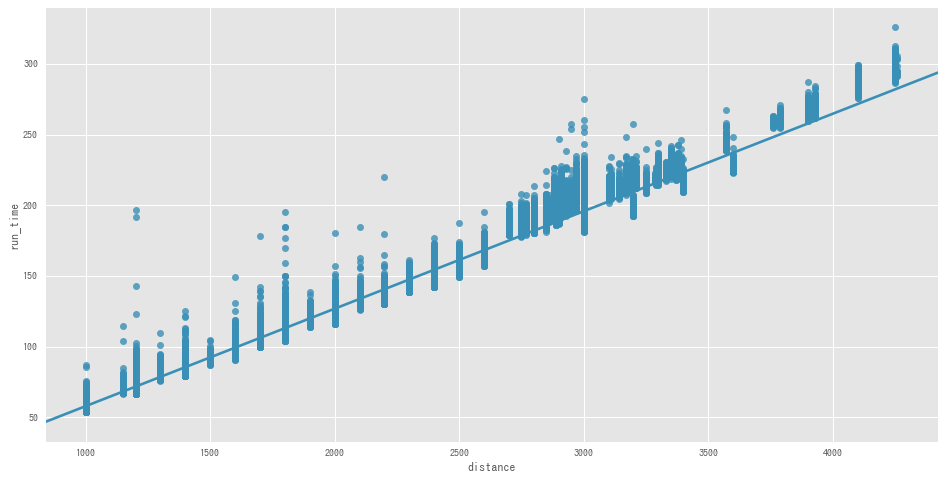

In [6]:
# Get the relationship between time and distance
dist_time = sm.OLS(race_df['run_time'], race_df['distance'])
dist_time_re = dist_time.fit()
print(dist_time_re.summary())
sns.regplot(y='run_time', x='distance', data=race_df, color='#3A8FB7')

## 2.2 Horse

### 2.2.1 Horse Dataframe 

In [7]:
# Do some type transformation for certain columns
horse_df['gender'] = horse_df['gender'].apply(lambda x: x[0])

# Overview of the dataframe structure
horse_df.sample(n=5).T

,8779,21137,1125,68511,8785
horse_id,1998105039,2001104267,1997104472,2011100265,1998103723
horse_name,マイネルアンフィニ,ベストフィーリング,セタガヤズシオウ,ルリジューズ,バンブージャック
date_of_birth,1998年2月28日,2001年3月17日,1997年5月30日,2011年4月2日,1998年4月29日
trainer,成島英春 (美浦),橋本和男 (兵庫),阿部新生 (美浦),伊藤圭三 (美浦),角田末男 (兵庫)
owner,サラブレッドクラブ・ラフィアン,伊藤和彦,千田幸信,伊達敏明,有バンブー牧場
breeder,幸牧場,千代田牧場,アラキファーム,サンシャイン牧場,バンブー牧場
place_of_birth,静内町,静内町,新冠町,日高町,浦河町
transaction_price,-,378万円 (2002年 千葉サラブレッド・セール),-,-,-
prize_obtained,484万円 (中央) /35万円 (地方),125万円 (中央) /38万円 (地方),"2,948万円 (中央)",41万円 (地方),153万円 (中央) /821万円 (地方)
race_record,14戦0勝 [ 0-2-0-12 ],20戦1勝 [ 1-0-1-18 ],19戦3勝 [ 3-1-0-15 ],29戦1勝 [ 1-1-4-23 ],73戦7勝 [ 7-5-8-53 ]


In [8]:
# Describe the columns of the dataframe
horse_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
horse_id,86803,NaN,NaN,NaN,2.0058e+09,5.64155e+06,1.9861e+09,2.0011e+09,2.0061e+09,2.0111e+09,2.01511e+09
horse_name,86803,85726,キセキ,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_of_birth,86803,3905,2002年4月3日,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trainer,86801,2072,(地方),541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
owner,86799,6511,サンデーレーシング,1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
breeder,86781,4264,ノーザンファーム,4743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
place_of_birth,86800,106,浦河町,16125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_price,86803,7774,-,68142,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prize_obtained,86803,30894,0万円,14749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race_record,86803,22569,2戦0勝 [ 0-0-0-2 ],3643,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2.2 Gender and Breed 

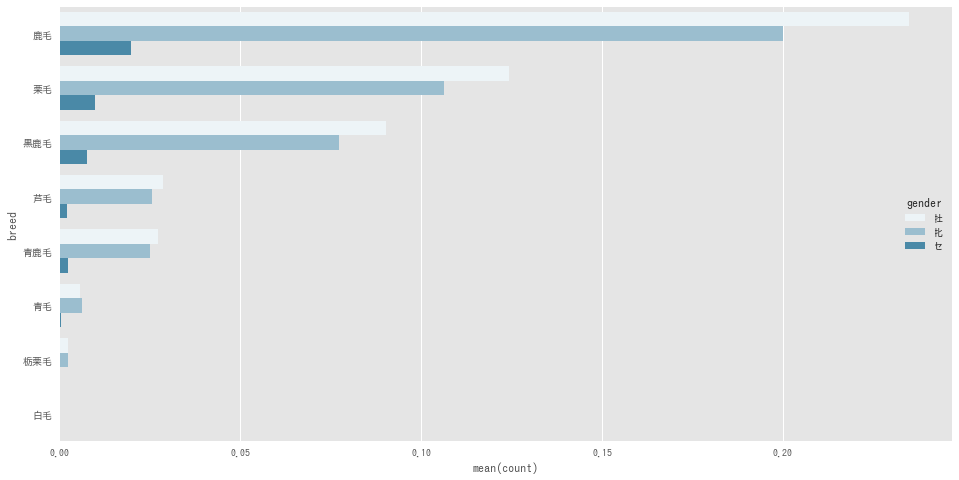

In [9]:
# Get gender and breed information
breed_gender_count = horse_df.groupby(['breed', 'gender']).agg({'horse_name': 'count'}).reset_index()
breed_gender_count.columns = ['breed', 'gender', 'count']
breed_gender_count = breed_gender_count.sort_values('count', ascending=False)
breed_gender_count['count'] = breed_gender_count['count'] / breed_gender_count['count'].sum()
sns.barplot(x='count', y='breed', data=breed_gender_count, color='#3A8FB7', hue='gender')

### 2.2.3 Horse and Run Time

In [10]:
# Merge race and horse dataframe and alter datetime type of information
horse_race = race_df.merge(horse_df, left_on='horse_id', right_on='horse_id')
horse_race['run_date'] = horse_race['run_date'].str.cat(horse_race['time'], sep=' ').apply(lambda x: pd.Timestamp(x))
horse_race['date_of_birth'] = horse_race['date_of_birth'].apply(lambda x: pd.Timestamp('-'.join(re.findall(r'\d+', x))))
horse_race['curr_age'] = horse_race['run_date'].subtract(horse_race['date_of_birth']).dt.days / 365.0

# Replace abnormal age value by the original sex/age string
# ori_age = horse_race['sex_age'].apply(lambda string: float(string[1]))
# age_diff = horse_race['curr_age'] - ori_age
# horse_race.loc[abs(age_diff) > 1, 'curr_age'] = ori_age
horse_race.sample(n=5).T

,286881,773437,72867,453790,540044
run_date,2008-05-10 15:05:00,2015-06-07 13:55:00,2001-01-21 16:10:00,2008-10-26 09:55:00,2010-05-08 12:50:00
place,東京,東京,中山,東京,京都
race,10R,8R,12R,1R,5R
title,晩春S(1600万下),3歳上500万下,4歳上500万下,2歳未勝利,3歳未勝利
type,芝,ダ,ダ,芝,芝
track,左,左,右,左,右
distance,1600,1400,1800,1400,1800
weather,雨,晴,晴,曇,晴
condition,稍重,稍重,稍重,良,良
time,15:05,13:55,16:10,09:55,12:50


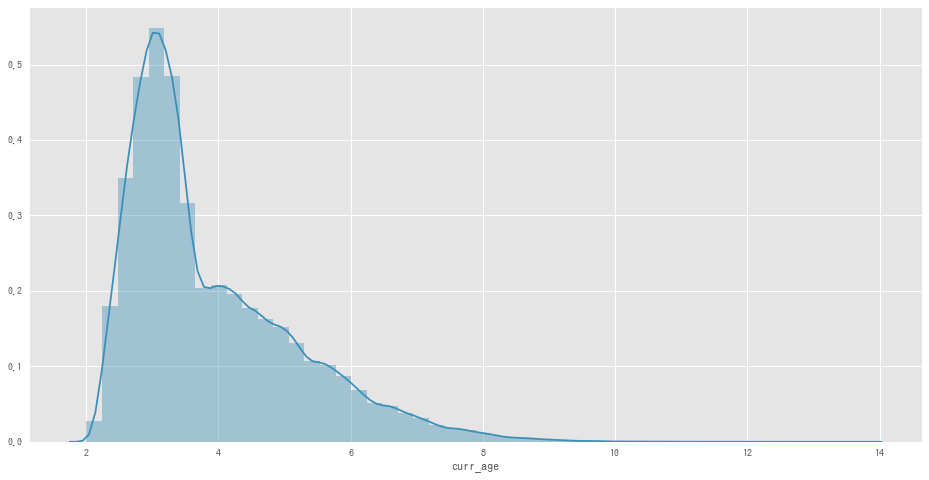

In [11]:
# Get the histogram of horse age relative to the run date and time
sns.distplot(horse_race['curr_age'], color='#3A8FB7')

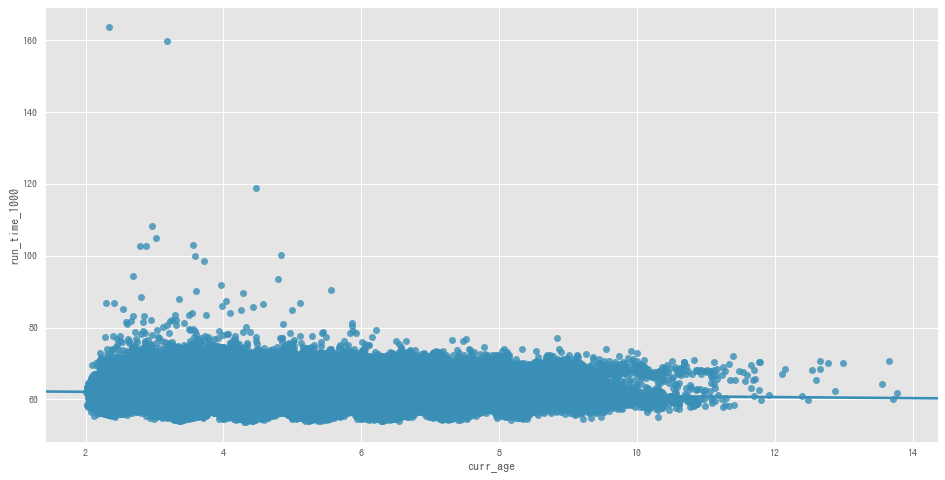

In [12]:
horse_race['run_time_1000'] = horse_race['run_time'] / (horse_race['distance'] / 1000)
sns.regplot(x='curr_age', y='run_time_1000', data=horse_race, color='#3A8FB7')

## 2.3 Individuals

In [13]:
# Do some type transformation for certain columns
for columns in list(individual_df.columns)[2:-1]:
    individual_df[columns] = individual_df[columns].apply(lambda x: x.replace(',', '') 
                                                          if type(x) not in [int, float] else x)

# Overview of the dataframe structure
individual_df.sample(n=5).T

,84174,5360,51101,106942,20452
individual_id,840872,00224,100093,780880,100070
individual_type,生産者,調教師,生産者,生産者,生産者
name,Pacelco S.A. & Chelston Stud,[西]武田博,大平福蔵,Abergwaun Farms,漆原哲雄
year,2003,1997,1998,2009,2000
rank,1382,144,1266,1335,824
first,0,11,0,0,2
second,0,12,1,0,0
third,0,16,1,0,1
out,4,130,0,1,4
races_major,0,2,0,0,0


In [14]:
# Describe the columns of the dataframe
individual_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,103414.0,2002.726043,8.649315,1986.0,1996.0,2003.000,2010.000,2018.0
rank,103414.0,654.560156,446.568453,1.0,228.0,619.000,1055.000,1547.0
first,103349.0,3.633746,11.351973,0.0,0.0,1.000,3.000,592.0
second,103349.0,3.617868,10.397905,0.0,0.0,1.000,3.000,517.0
third,103349.0,3.612256,9.783531,0.0,0.0,1.000,3.000,437.0
races_major,103349.0,1.898238,7.523216,0.0,0.0,0.000,1.000,476.0
wins_major,103349.0,0.134873,0.806087,0.0,0.0,0.000,0.000,51.0
wins_special,103349.0,0.837821,3.086691,0.0,0.0,0.000,1.000,170.0
wins_flat,103349.0,2.661051,7.865808,0.0,0.0,1.000,2.000,385.0
wins_grass,103349.0,1.767003,6.583385,0.0,0.0,0.000,1.000,431.0


## 2.4 Jockey and Trainer Profile 

In [15]:
# Do some type transformation for certain columns
for columns in trainer_df.columns:
    trainer_df[columns] = trainer_df[columns].apply(lambda x: np.nan if x == 'null' else x)

for columns in jockey_df.columns:
    jockey_df[columns] = jockey_df[columns].apply(lambda x: np.nan if x == 'null' else x)
    if columns in ['height', 'weight']:
        jockey_df[columns] = jockey_df[columns].apply(lambda x: x if pd.isnull(x) else re.search(r'\d+', x).group(0))
        jockey_df[columns] = jockey_df[columns].astype(float)

# Overview of the dataframe structure
trainer_df.sample(n=5).T

,451,715,446,592,132
trainer_id,5340,5523,1052,5421,435
trainer_name,[外]ウーレガ,[地]中川一男,[東]菊川正達,[地]室井兼雄,[東]藤原辰雄
date_of_birth,1957/01/05,1940/03/25,1962/11/17,1928/03/26,1952/01/25
place_of_birth,地方,地方,東京都,地方,北海道
first_run_date,NaN,NaN,2001/03/10,NaN,1995/03/11
first_run_horse,NaN,NaN,ヤワタセブン,NaN,ブランドロイヤル
first_win_date,NaN,NaN,2001/05/26,NaN,1995/04/15
first_win_horse,NaN,NaN,ヤワタセブン,NaN,グランコアレス


In [16]:
# Overview of the dataframe structure
jockey_df.sample(n=5).T

,472,235,353,254,529
jockey_id,5000,417,5272,5203,5363
jockey_name,酒井忍,仙道光男,岡村裕基,岩田康誠,ラスボン
date_of_birth,1973/01/08,1959/11/03,1971/03/16,1974/03/12,1980/08/27
place_of_birth,地方,地方,地方,兵庫県,地方
blood_type,NaN,NaN,NaN,AB型,NaN
height,NaN,NaN,NaN,159,NaN
weight,NaN,NaN,NaN,50,NaN
first_flat_run_date,1994/07/24,1993/07/18,2001/02/04,1999/11/07,NaN
first_flat_run_horse,イブキハイスピード,サブリナチェリー,ミレニアムレコード,イシヤクモンド,NaN
first_flat_win_date,NaN,NaN,NaN,2000/09/16,NaN


In [17]:
# Describe the columns of the dataframe
trainer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
trainer_id,1021.0,3580.235064,2302.371476,101.0,1020.0,5181.0,5460.0,5717.0


In [18]:
# Describe the columns of the dataframe
jockey_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
jockey_id,807,NaN,NaN,NaN,3321.83,2224.18,140,1010.5,5089,5346.5,5551
jockey_name,807,801,ウィリア,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_of_birth,807,780,1971/03/12,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
place_of_birth,807,41,地方,573,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blood_type,229,4,A型,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,236,NaN,NaN,NaN,161.614,4.25562,149,159,162,164,174
weight,236,NaN,NaN,NaN,48.4619,3.01532,43,46,47,51,59
first_flat_run_date,735,424,1996/03/02,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_flat_run_horse,735,727,ニホンピロナーリー,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_flat_win_date,452,404,2009/12/05,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
